In [1]:
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
import function
import matplotlib.pyplot as plt
import math

In [2]:
p_1=50
p_2=50
n=100
r_J=10
r_1=5
r_2=5
r_prop=0.8
w_J=2.0
w_1=1.0
w_2=1.0
X1_erro=0.2
X2_erro=0.2
y_erro=0.2

In [3]:
X_1,X_2,y=function.gene_data(p_1,p_2,n,r_J,r_1,r_2,r_prop,w_J,w_1,w_2,X1_erro,X2_erro,y_erro)

## U_1,U_2,W_1,W_2,S_1,S_2,S_J,theta_1,theta_2を初期化する

In [4]:
U_1=np.random.uniform(low=-0.1, high=0.1, size=(p_1,r_J))
U_2=np.random.uniform(low=-0.1, high=0.1, size=(p_2,r_J))
W_1=np.random.uniform(low=-0.1, high=0.1, size=(p_1,r_1))
W_2=np.random.uniform(low=-0.1, high=0.1, size=(p_2,r_2))
theta_1=np.random.uniform(low=-0.1, high=0.1, size=int(r_J))
theta_21=np.random.uniform(low=-0.1, high=0.1, size=int(r_1))
theta_22=np.random.uniform(low=-0.1, high=0.1, size=int(r_2))
S_J=np.random.uniform(low=-0.1, high=0.1, size=(r_J,n))
S_1=np.random.uniform(low=-0.1, high=0.1, size=(r_1,n))
S_2=np.random.uniform(low=-0.1, high=0.1, size=(r_2,n))



## 手順２(a)を実行

In [44]:
U=np.row_stack((U_1,U_2,theta_1))
U.shape

(101, 10)

In [43]:

U_theta_1=np.row_stack((U,theta_1))
U_theta_1.shape

(101, 10)

In [6]:
X=np.row_stack((X_1,X_2))
X_y=np.row_stack((X,y))
X_y.shape

(101, 100)

In [7]:
W_1_S_1=W_1.dot(S_1)
W_2_S_2=W_2.dot(S_2)
W_S=np.row_stack((W_1_S_1,W_2_S_2))
theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i))
W_theta_2i_S_i.shape

(101, 100)

In [8]:
W_theta_2i_S_i

array([[ 0.00211299, -0.00241744,  0.00363166, ..., -0.00262012,
        -0.0114125 ,  0.00577675],
       [ 0.00103646, -0.01304383,  0.00949032, ..., -0.00496066,
        -0.01680659,  0.0100744 ],
       [ 0.01403404, -0.00115129,  0.00899725, ...,  0.01299299,
        -0.00146018, -0.01000239],
       ...,
       [ 0.0099593 , -0.00304291, -0.01778919, ...,  0.01424593,
         0.00819844, -0.00215916],
       [-0.01029518,  0.00809836, -0.00192063, ...,  0.00553291,
         0.00359442, -0.00293652],
       [ 0.0160838 ,  0.01688482, -0.00194853, ...,  0.01740816,
        -0.01735197,  0.0010907 ]])

In [9]:
S_J=U_theta_1.T.dot(X_y-W_theta_2i_S_i)
S_J

array([[-5.78317910e-01, -6.83721404e-01, -2.03067903e-02,
        -5.03204592e-02, -6.37642631e-01, -6.42800971e-01,
        -1.99266265e-01, -4.45074521e-01, -5.52808937e-02,
        -1.14864912e+00, -4.62978034e-01, -4.18966278e-01,
        -3.16268620e-01,  3.76801987e-01, -5.51181940e-01,
        -4.43926120e-01, -4.94915667e-01, -5.18771706e-01,
        -7.17810921e-01, -1.71014662e-01, -1.16478312e+00,
        -4.39411855e-02, -1.24034050e-01, -2.48415492e-02,
        -1.06995667e+00, -1.45294321e+00, -3.16799510e-01,
        -1.21522267e-01, -7.37014399e-02, -6.18749934e-01,
        -4.69188028e-01, -9.09723816e-02, -8.38058234e-01,
        -5.29335076e-02, -4.58612472e-01, -5.23912698e-01,
        -2.33538871e-01,  9.11976106e-02, -7.77343939e-01,
        -2.49320745e-01, -7.14991439e-01, -1.00685785e+00,
         7.80649274e-01, -7.05774899e-01, -1.59354383e-01,
        -3.54036703e-02, -4.19437530e-01, -1.09353753e-01,
        -3.24311996e-01,  2.46162082e-01, -1.07965959e+0

In [41]:
S_J.shape

(10, 100)

In [10]:
# ms = StandardScaler()
# S_J_final = ms.fit_transform(S_J)

## 手順２(b)を実行

In [11]:
X_y_joint=X_y-W_theta_2i_S_i
U_J,sigma_J,VT_J=np.linalg.svd(X_y-W_theta_2i_S_i,full_matrices=False)

In [12]:
X_y_joint.shape

(101, 100)

In [13]:
sigma_J

array([7.60131713e+01, 2.17525910e+01, 2.02846280e+01, 1.80684146e+01,
       1.76398523e+01, 1.67631051e+01, 1.58981107e+01, 1.52322952e+01,
       1.37882363e+01, 1.11452584e+01, 1.10979515e+01, 9.72100573e+00,
       8.90274303e+00, 8.72821375e+00, 8.43424518e+00, 7.95426396e+00,
       7.27656947e+00, 7.17274708e+00, 7.02086930e+00, 6.93003963e+00,
       6.79564154e+00, 6.61242595e+00, 6.36083212e+00, 6.27430332e+00,
       6.23664079e+00, 6.14549356e+00, 5.99898656e+00, 5.85472187e+00,
       5.78112826e+00, 5.67796475e+00, 5.64464116e+00, 5.34520537e+00,
       5.26787325e+00, 5.07757576e+00, 5.04288888e+00, 4.99953527e+00,
       4.83291470e+00, 4.80130031e+00, 4.67879729e+00, 4.53848781e+00,
       4.43895648e+00, 4.33869288e+00, 4.27722667e+00, 4.24961346e+00,
       4.17999479e+00, 4.05047000e+00, 3.91202400e+00, 3.86243230e+00,
       3.83331279e+00, 3.64234171e+00, 3.58319035e+00, 3.45204291e+00,
       3.44522704e+00, 3.30236031e+00, 3.24745699e+00, 3.13867732e+00,
      

In [14]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

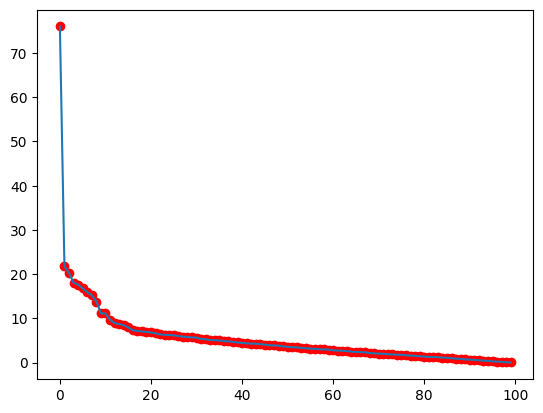

In [15]:
plt.plot(sigma_J)
plt.scatter(range(len(sigma_J)),sigma_J,color="red")
plt.show

In [16]:
U_J.shape

(101, 100)

In [17]:
U_1=U_J[:p_1,:r_J]
U_2=U_J[p_1:p_1+p_2,:r_J]
theta_1=U_J[p_1+p_2:,:r_J]

## 手順２(c)を実行

In [18]:
S_1.shape

(5, 100)

#### データ１に対して実行

In [19]:
W_1_theta_21=np.row_stack((W_1,theta_21))
W_1_theta_21.shape

(51, 5)

In [20]:
y_theta_22S_2=y-theta_22.dot(S_2)
X_1_y_theta_22S_2=np.row_stack((X_1,y_theta_22S_2))
X_1_y_theta_22S_2.shape

(51, 100)

In [21]:
U_1_S_J=U_1.dot(S_J)
theta_1_S_J=theta_1.dot(S_J)
U_1_S_J_theta_1_S_J=np.row_stack((U_1_S_J,theta_1_S_J))
U_1_S_J_theta_1_S_J.shape

(51, 100)

In [22]:
P_SJ=S_J.T.dot(np.linalg.inv(S_J.dot(S_J.T))).dot(S_J)
diag_matrix = np.diag([1] * n)
P_SJ_C=diag_matrix-P_SJ
P_SJ_C.shape

(100, 100)

In [23]:
S_1=W_1_theta_21.T.dot((X_1_y_theta_22S_2-U_1_S_J_theta_1_S_J)).dot(P_SJ_C)
S_1.shape


(5, 100)

In [24]:
U_I_1,sigma_1,VT_1=np.linalg.svd((X_1_y_theta_22S_2-U_1_S_J_theta_1_S_J).dot(P_SJ_C),full_matrices=False)
U_I_1.shape

(51, 51)

<function matplotlib.pyplot.show(close=None, block=None)>

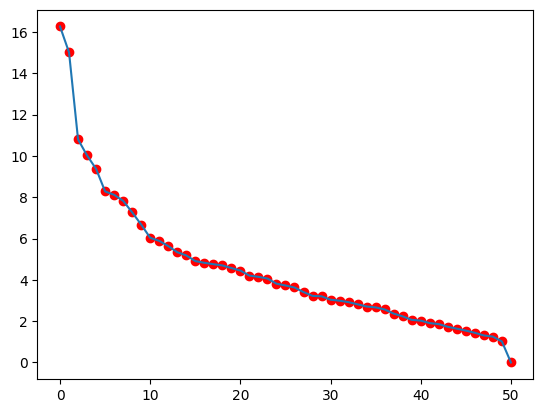

In [25]:
plt.plot(sigma_1)
plt.scatter(range(len(sigma_1)),sigma_1,color="red")
plt.show

In [26]:
W_1=U_I_1[:p_1,:r_1]
theta_21=U_I_1[p_1:,:r_1]
theta_21.shape

(1, 5)

### データ２に対して適用

In [27]:
W_2_theta_22=np.row_stack((W_2,theta_22))
W_2_theta_22.shape

(51, 5)

In [28]:
y_theta_21S_1=y-theta_21.dot(S_1)
X_2_y_theta_21S_1=np.row_stack((X_2,y_theta_21S_1))
X_2_y_theta_21S_1.shape

(51, 100)

In [29]:
U_2_S_J=U_2.dot(S_J)
theta_1_S_J=theta_1.dot(S_J)
U_2_S_J_theta_1_S_J=np.row_stack((U_2_S_J,theta_1_S_J))
U_2_S_J_theta_1_S_J.shape

(51, 100)

In [30]:
S_2=W_2_theta_22.T.dot(X_2_y_theta_21S_1-U_2_S_J_theta_1_S_J).dot(P_SJ_C)
S_2.shape

(5, 100)

In [31]:
U_I_2,sigma_2,VT_2=np.linalg.svd((X_2_y_theta_21S_1-U_2_S_J_theta_1_S_J).dot(P_SJ_C),full_matrices=False)
U_I_2.shape

(51, 51)

<function matplotlib.pyplot.show(close=None, block=None)>

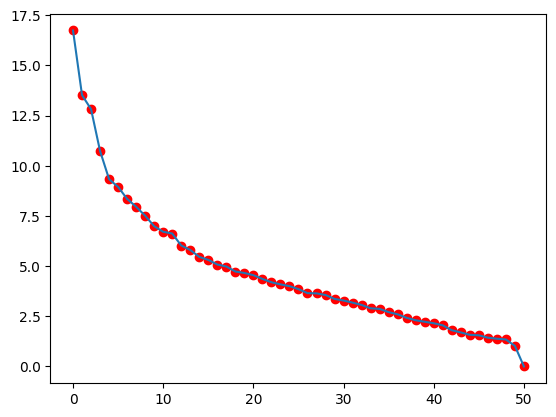

In [32]:
plt.plot(sigma_2)
plt.scatter(range(len(sigma_2)),sigma_2,color="red")
plt.show

In [33]:
W_2=U_I_2[:p_2,:r_2]
theta_22=U_I_2[p_2:,:r_2]
theta_22.shape

(1, 5)

In [34]:
U_1.shape

(50, 10)

In [35]:
U=np.row_stack((U_1,U_2))
U_theta_1=np.row_stack((U,theta_1))
W_1_S_1=W_1.dot(S_1)
W_2_S_2=W_2.dot(S_2)
W_S=np.row_stack((W_1_S_1,W_2_S_2))
theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i))


In [36]:
W_theta_2i_S_i.shape

(101, 100)

In [37]:
hat_X_y=U_theta_1.dot(S_J)+W_theta_2i_S_i

In [38]:
np.linalg.norm(X_y-hat_X_y,ord=2)

72.74273999122569

In [39]:
X_y

array([[ 0.00950953,  0.34940329, -0.77967265, ...,  0.1763447 ,
        -0.25362197, -0.97852224],
       [ 0.44157245, -1.33270744, -0.95343861, ...,  0.60318056,
         0.40834681, -0.08479353],
       [ 0.4067808 , -1.43760389,  0.18555892, ...,  0.29920151,
        -0.17914824, -0.33255786],
       ...,
       [ 0.36012342, -0.56777976,  0.22892796, ...,  0.97078343,
        -0.14860305,  1.02425882],
       [ 0.88276879,  0.65746189,  0.63931904, ...,  0.82553589,
         1.71780741,  1.95072188],
       [ 0.47314242,  0.69855327, -0.37534656, ..., -0.50099755,
        -0.93447703, -0.40184293]])

In [40]:
hat_X_y

array([[ 0.14042916, -0.04580434, -0.01328388, ..., -0.01269597,
        -0.00735729,  0.03934532],
       [ 0.00917753,  0.00518518,  0.13104932, ..., -0.1971251 ,
        -0.26249564, -0.03504099],
       [-0.33070073, -0.3234368 , -0.10350791, ..., -0.32680001,
        -0.05603322, -0.181346  ],
       ...,
       [-0.16867101, -0.00622962, -0.13048033, ..., -0.04986642,
        -0.06566035, -0.24351054],
       [-0.20204832,  0.36221334,  0.21424371, ...,  0.13122509,
        -0.16578218, -0.12065265],
       [-0.10393642,  0.28705455,  0.07395373, ...,  0.13831107,
        -0.28142023, -0.42904884]])

In [52]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 2], [2, 2]])
np.linalg.norm(A - B, ord=2)**2

5.000000000000001

In [47]:
import math

In [53]:
U_J,sigma_J,VT_J=np.linalg.svd(A,full_matrices=False) 
U_J

array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]])

In [51]:
U_J,sigma_J,VT_J=np.linalg.svd(A,full_matrices=False) 
U_J

array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]])